## Load Datasets

### Subtask:
Load the `olist_orders_dataset.csv`, `olist_customers_dataset.csv`, `olist_order_items_dataset.csv`, `olist_products_dataset.csv`, `olist_sellers_dataset.csv`, `olist_order_payments_dataset.csv`, and `olist_geolocation_dataset.csv` files into pandas DataFrames.


**Reasoning**:
First, I'll import the pandas library, which is essential for data manipulation in Python, especially for working with DataFrames. Then, I'll load each specified CSV file into its corresponding DataFrame.



In [151]:
import pandas as pd

orders_df = pd.read_csv('../data/olist_orders_dataset.csv')
customers_df = pd.read_csv('../data/olist_customers_dataset.csv')
order_items_df = pd.read_csv('../data/olist_order_items_dataset.csv')
products_df = pd.read_csv('../data/olist_products_dataset.csv')
sellers_df = pd.read_csv('../data/olist_sellers_dataset.csv')
payments_df = pd.read_csv('../data/olist_order_payments_dataset.csv')
geolocation_df = pd.read_csv('../data/olist_geolocation_dataset.csv')

print("DataFrames loaded successfully.")

print("\norders_df head:")
print(orders_df.head())

print("\ncustomers_df head:")
print(customers_df.head())

print("\norder_items_df head:")
print(order_items_df.head())

print("\nproducts_df head:")
print(products_df.head())

print("\nsellers_df head:")
print(sellers_df.head())

print("\npayments_df head:")
print(payments_df.head())

print("\ngeolocation_df head:")
print(geolocation_df.head())

DataFrames loaded successfully.

orders_df head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   

## Merge Core Tables

### Subtask:
Perform initial merges to combine `orders_df`, `customers_df`, `order_items_df`, `products_df`, `sellers_df`, and `payments_df` based on common identifiers. Aggregate payment information before merging.


**Reasoning**:
The first step is to aggregate the `payments_df` by `order_id` to calculate the total `payment_value` and the number of payments, as specified in the instructions. This aggregated data will then be used in subsequent merge operations.



In [152]:
payments_agg_df = payments_df.groupby('order_id').agg(
    total_payment_value=('payment_value', 'sum'),
    num_payments=('payment_sequential', 'count')
).reset_index()

print("Aggregated payments_df head:")
print(payments_agg_df.head())

Aggregated payments_df head:
                           order_id  total_payment_value  num_payments
0  00010242fe8c5a6d1ba2dd792cb16214                72.19             1
1  00018f77f2f0320c557190d7a144bdd3               259.83             1
2  000229ec398224ef6ca0657da4fc703e               216.87             1
3  00024acbcdf0a6daa1e931b038114c75                25.78             1
4  00042b26cf59d7ce69dfabb4e55b4fd9               218.04             1


**Reasoning**:
The next step is to merge the `orders_df` with the `customers_df` using a left merge on the `customer_id` column, as specified in the instructions. The result will be stored in `merged_df`.



In [153]:
merged_df = orders_df.merge(customers_df, on='customer_id', how='left')

print("Merged orders_df and customers_df head:")
print(merged_df.head())

Merged orders_df and customers_df head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1       

**Reasoning**:
Continuing with the merge operations, the next step is to merge the `merged_df` (which currently contains orders and customer information) with the `payments_agg_df` (which contains aggregated payment information) on the `order_id` column using a left merge, as specified in the instructions. The result will update `merged_df`.



In [154]:
merged_df = merged_df.merge(payments_agg_df, on='order_id', how='left')

print("Merged orders_df, customers_df and payments_agg_df head:")
print(merged_df.head())

Merged orders_df, customers_df and payments_agg_df head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:

**Reasoning**:
The next step is to merge the current `merged_df` with the `order_items_df` on the `order_id` column using a left merge, as specified in the instructions. This merge will add item-level details to the combined DataFrame, and the result will update `merged_df`.



In [155]:
merged_df = merged_df.merge(order_items_df, on='order_id', how='left')

print("Merged orders_df, customers_df, payments_agg_df and order_items_df head:")
print(merged_df.head())

Merged orders_df, customers_df, payments_agg_df and order_items_df head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00         

**Reasoning**:
The next step is to merge the current `merged_df` with the `products_df` on the `product_id` column using a left merge, as specified in the instructions. This merge will add product-related information to the combined DataFrame, and the result will update `merged_df`.



In [156]:
merged_df = merged_df.merge(products_df, on='product_id', how='left')

print("Merged orders_df, customers_df, payments_agg_df, order_items_df and products_df head:")
print(merged_df.head())

Merged orders_df, customers_df, payments_agg_df, order_items_df and products_df head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:5

**Reasoning**:
The next step is to merge the current `merged_df` with the `sellers_df` on the `seller_id` column using a left merge, as specified in the instructions. This merge will add seller-related information to the combined DataFrame, and the result will update `merged_df`.



In [157]:
merged_df = merged_df.merge(sellers_df, on='seller_id', how='left')

print("Merged orders_df, customers_df, payments_agg_df, order_items_df, products_df and sellers_df head:")
print(merged_df.head())

Merged orders_df, customers_df, payments_agg_df, order_items_df, products_df and sellers_df head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          201

## Filter Delivered Orders

### Subtask:
Filter the merged DataFrame to include only orders with `order_status` set to 'delivered', as specified.


**Reasoning**:
Filter the `merged_df` to include only orders with the 'delivered' status and then display the head of the updated DataFrame.



In [158]:
merged_df = merged_df[merged_df['order_status'] == 'delivered']

print("Filtered merged_df (only 'delivered' orders) head:")
print(merged_df.head())

Filtered merged_df (only 'delivered' orders) head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13 

## Extract Temporal Features

### Subtask:
Convert relevant timestamp columns to datetime objects. From `order_purchase_timestamp`, extract day of week, month, and potentially season. Calculate the time difference from `order_purchase_timestamp` to `order_approved_at` and `order_delivered_carrier_date`.


**Reasoning**:
First, I'll convert the specified timestamp columns in `merged_df` to datetime objects to enable time-based operations.



In [159]:
for col in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    merged_df[col] = pd.to_datetime(merged_df[col])

print("Timestamp columns converted to datetime objects.")

Timestamp columns converted to datetime objects.


**Reasoning**:
Now that the timestamp columns are converted to datetime objects, I will extract the day of the week and month from `order_purchase_timestamp`, calculate the time differences as specified, and then display the head of the DataFrame to show the new features.



In [160]:
merged_df['purchase_dayofweek'] = merged_df['order_purchase_timestamp'].dt.dayofweek
merged_df['purchase_month'] = merged_df['order_purchase_timestamp'].dt.month
merged_df['time_to_approve_order'] = (merged_df['order_approved_at'] - merged_df['order_purchase_timestamp']).dt.total_seconds() / 3600 # in hours
merged_df['time_to_carrier_delivery'] = (merged_df['order_delivered_carrier_date'] - merged_df['order_purchase_timestamp']).dt.total_seconds() / 3600 # in hours


print("Temporal features extracted and time differences calculated.")
print("\nmerged_df head with new temporal features:")
print(merged_df[['order_purchase_timestamp', 'purchase_dayofweek', 'purchase_month', 'time_to_approve_order', 'time_to_carrier_delivery']].head())

Temporal features extracted and time differences calculated.

merged_df head with new temporal features:
  order_purchase_timestamp  purchase_dayofweek  purchase_month  \
0      2017-10-02 10:56:33                   0              10   
1      2018-07-24 20:41:37                   1               7   
2      2018-08-08 08:38:49                   2               8   
3      2017-11-18 19:28:06                   5              11   
4      2018-02-13 21:18:39                   1               2   

   time_to_approve_order  time_to_carrier_delivery  
0               0.178333                 56.974167  
1              30.713889                 41.823056  
2               0.276111                  5.186389  
3               0.298056                 90.198056  
4               1.030556                 22.465278  


**Reasoning**:
To complete the subtask, I need to extract the season from the `order_purchase_timestamp` column. I will use a custom function to map months to seasons and then display the head of the DataFrame to show this new feature.



In [161]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

merged_df['purchase_season'] = merged_df['purchase_month'].apply(get_season)

print("Season extracted from purchase month.")
print("\nmerged_df head with new temporal features (including season):")
print(merged_df[['order_purchase_timestamp', 'purchase_dayofweek', 'purchase_month', 'purchase_season', 'time_to_approve_order', 'time_to_carrier_delivery']].head())

Season extracted from purchase month.

merged_df head with new temporal features (including season):
  order_purchase_timestamp  purchase_dayofweek  purchase_month  \
0      2017-10-02 10:56:33                   0              10   
1      2018-07-24 20:41:37                   1               7   
2      2018-08-08 08:38:49                   2               8   
3      2017-11-18 19:28:06                   5              11   
4      2018-02-13 21:18:39                   1               2   

  purchase_season  time_to_approve_order  time_to_carrier_delivery  
0            fall               0.178333                 56.974167  
1          summer              30.713889                 41.823056  
2          summer               0.276111                  5.186389  
3            fall               0.298056                 90.198056  
4          winter               1.030556                 22.465278  


In [162]:
customer_geolocation_df = geolocation_df.copy()
customer_geolocation_df.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng'
}, inplace=True)

# Drop duplicate customer zip codes to ensure a clean merge (one customer zip code can have multiple geo locations, take the first one)
customer_geolocation_df.drop_duplicates(subset=['customer_zip_code_prefix'], inplace=True)

print("Customer geolocation DataFrame prepared:")
print(customer_geolocation_df.head())

Customer geolocation DataFrame prepared:
   customer_zip_code_prefix  customer_lat  customer_lng geolocation_city  \
0                      1037    -23.545621    -46.639292        sao paulo   
1                      1046    -23.546081    -46.644820        sao paulo   
3                      1041    -23.544392    -46.639499        sao paulo   
4                      1035    -23.541578    -46.641607        sao paulo   
5                      1012    -23.547762    -46.635361        são paulo   

  geolocation_state  
0                SP  
1                SP  
3                SP  
4                SP  
5                SP  


**Reasoning**:
Now that the `customer_geolocation_df` is prepared, I will merge it with the `merged_df` using a left merge on the `customer_zip_code_prefix` column, as per the instructions, to add customer latitude and longitude to the main DataFrame.



In [163]:
merged_df = merged_df.merge(customer_geolocation_df[['customer_zip_code_prefix', 'customer_lat', 'customer_lng', 'geolocation_state']], on='customer_zip_code_prefix', how='left')
merged_df.rename(columns={'geolocation_state': 'customer_state_geo'}, inplace=True)

print("Merged merged_df with customer geolocation head:")
print(merged_df.head())

Merged merged_df with customer geolocation head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1    

**Reasoning**:
Following the instructions, the next step is to prepare the `geolocation_df` for the seller merge. This involves creating a copy and renaming the relevant columns (`geolocation_zip_code_prefix` to `seller_zip_code_prefix`, `geolocation_lat` to `seller_lat`, `geolocation_lng` to `seller_lng`) to avoid naming conflicts and facilitate the merge.



In [164]:
seller_geolocation_df = geolocation_df.copy()
seller_geolocation_df.rename(columns={
    'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng'
}, inplace=True)

# Drop duplicate seller zip codes to ensure a clean merge
seller_geolocation_df.drop_duplicates(subset=['seller_zip_code_prefix'], inplace=True)

print("Seller geolocation DataFrame prepared:")
print(seller_geolocation_df.head())

Seller geolocation DataFrame prepared:
   seller_zip_code_prefix  seller_lat  seller_lng geolocation_city  \
0                    1037  -23.545621  -46.639292        sao paulo   
1                    1046  -23.546081  -46.644820        sao paulo   
3                    1041  -23.544392  -46.639499        sao paulo   
4                    1035  -23.541578  -46.641607        sao paulo   
5                    1012  -23.547762  -46.635361        são paulo   

  geolocation_state  
0                SP  
1                SP  
3                SP  
4                SP  
5                SP  


**Reasoning**:
Now that the `seller_geolocation_df` is prepared, I will merge it with the `merged_df` using a left merge on the `seller_zip_code_prefix` column, as per the instructions, to add seller latitude, longitude, and state information to the main DataFrame.



In [165]:
merged_df = merged_df.merge(seller_geolocation_df[['seller_zip_code_prefix', 'seller_lat', 'seller_lng', 'geolocation_state']], on='seller_zip_code_prefix', how='left')
merged_df.rename(columns={'geolocation_state': 'seller_state_geo'}, inplace=True)

print("Merged merged_df with seller geolocation head:")
print(merged_df.head())

Merged merged_df with seller geolocation head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1      

In [166]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

merged_df['distance_customer_seller'] = merged_df.apply(
    lambda row: haversine(row['customer_lat'], row['customer_lng'], row['seller_lat'], row['seller_lng']),
    axis=1
)

print("Haversine distance calculated between customer and seller.")
print("\nmerged_df head with new distance column:")
print(merged_df[['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng', 'distance_customer_seller']].head())

Haversine distance calculated between customer and seller.

merged_df head with new distance column:
   customer_lat  customer_lng  seller_lat  seller_lng  \
0    -23.574809    -46.587471  -23.680114  -46.452454   
1    -12.169860    -44.988369  -19.810119  -43.984727   
2    -16.746337    -48.514624  -21.362358  -48.232976   
3     -5.767733    -35.275467  -19.840168  -43.923299   
4    -23.675037    -46.524784  -23.551707  -46.260979   

   distance_customer_seller  
0                 18.063837  
1                856.292580  
2                514.130333  
3               1822.800366  
4                 30.174037  


In [167]:
order_details_df = merged_df.groupby('order_id').agg(
    num_items=('order_item_id', 'count'),
    num_unique_sellers=('seller_id', 'nunique'),
    total_freight_value=('freight_value', 'sum')
).reset_index()

print("Aggregated order details DataFrame head:")
print(order_details_df.head())

Aggregated order details DataFrame head:
                           order_id  num_items  num_unique_sellers  \
0  00010242fe8c5a6d1ba2dd792cb16214          1                   1   
1  00018f77f2f0320c557190d7a144bdd3          1                   1   
2  000229ec398224ef6ca0657da4fc703e          1                   1   
3  00024acbcdf0a6daa1e931b038114c75          1                   1   
4  00042b26cf59d7ce69dfabb4e55b4fd9          1                   1   

   total_freight_value  
0                13.29  
1                19.93  
2                17.87  
3                12.79  
4                18.14  


In [168]:
merged_df = merged_df.merge(order_details_df, on='order_id', how='left')

print("Merged merged_df with new order details features head:")
print(merged_df.head())

Merged merged_df with new order details features head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   

In [169]:
merged_df['shipping_time_days'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

print("Shipping time (in days) calculated.")
print("\nmerged_df head with new 'shipping_time_days' column:")
print(merged_df[['order_purchase_timestamp', 'order_delivered_customer_date', 'shipping_time_days']].head())

Shipping time (in days) calculated.

merged_df head with new 'shipping_time_days' column:
  order_purchase_timestamp order_delivered_customer_date  shipping_time_days
0      2017-10-02 10:56:33           2017-10-10 21:25:13                 8.0
1      2018-07-24 20:41:37           2018-08-07 15:27:45                13.0
2      2018-08-08 08:38:49           2018-08-17 18:06:29                 9.0
3      2017-11-18 19:28:06           2017-12-02 00:28:42                13.0
4      2018-02-13 21:18:39           2018-02-16 18:17:02                 2.0


In [170]:
import numpy as np
import pandas as pd

# 1. On enlève les lignes sans cible
df_model = merged_df.copy()
df_model = df_model[df_model["shipping_time_days"].notna()]

# 2. On enlève les délais aberrants (à adapter si besoin)
#    Ici on garde les livraisons entre 1 et 40 jours
df_model = df_model[
    (df_model["shipping_time_days"] >= 1) &
    (df_model["shipping_time_days"] <= 40)
].copy()

print("Nombre de commandes après filtrage :", len(df_model))
print(df_model["shipping_time_days"].describe())


Nombre de commandes après filtrage : 108379
count    108379.000000
mean         11.311555
std           7.277220
min           1.000000
25%           6.000000
50%          10.000000
75%          15.000000
max          40.000000
Name: shipping_time_days, dtype: float64


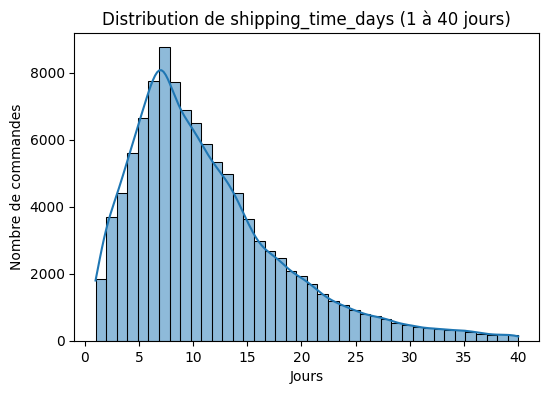

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df_model["shipping_time_days"], bins=40, kde=True)
plt.title("Distribution de shipping_time_days (1 à 40 jours)")
plt.xlabel("Jours")
plt.ylabel("Nombre de commandes")
plt.show()


In [172]:
merged_df['circuity_distance'] = merged_df['distance_customer_seller'] * 1.3

print("Circuity distance calculated.")
print("\nmerged_df head with new 'circuity_distance' column:")
print(merged_df[['distance_customer_seller', 'circuity_distance']].head())

Circuity distance calculated.

merged_df head with new 'circuity_distance' column:
   distance_customer_seller  circuity_distance
0                 18.063837          23.482988
1                856.292580        1113.180354
2                514.130333         668.369433
3               1822.800366        2369.640476
4                 30.174037          39.226248


In [173]:
data = merged_df

In [174]:
print("Sum of missing values for each column:")
print(data.isnull().sum())

Sum of missing values for each column:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        2
order_delivered_customer_date       8
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
total_payment_value                 3
num_payments                        3
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1537
product_name_lenght              1537
product_description_lenght       1537
product_photos_qty               1537
product_weight_g                   18
product_len

In [175]:
data["product_photos_qty"].head()

0    4.0
1    1.0
2    1.0
3    3.0
4    4.0
Name: product_photos_qty, dtype: float64

In [176]:
data = data.drop('product_photos_qty', axis = 1)

In [177]:
data['product_category_name'].fillna('None')

0          utilidades_domesticas
1                     perfumaria
2                     automotivo
3                       pet_shop
4                      papelaria
                   ...          
110192                     bebes
110193        eletrodomesticos_2
110194    informatica_acessorios
110195    informatica_acessorios
110196              beleza_saude
Name: product_category_name, Length: 110197, dtype: object

In [178]:
data['product_category_name'] = data['product_category_name'].fillna('None')

print("Missing values in 'product_category_name' filled with 'None'.")
print("\nUpdated data head:")
print(data[['product_category_name']].head())

print("\nMissing values in 'product_category_name' after filling:")
print(data['product_category_name'].isnull().sum())

Missing values in 'product_category_name' filled with 'None'.

Updated data head:
   product_category_name
0  utilidades_domesticas
1             perfumaria
2             automotivo
3               pet_shop
4              papelaria

Missing values in 'product_category_name' after filling:
0


In [179]:
data.dropna(subset=['product_weight_g'], inplace=True)

In [180]:
# Calculate the mean circuity_distance grouped by customer_city and seller_city
data['circuity_distance'] = data.groupby(['customer_city', 'seller_city'])['circuity_distance'].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with the overall mean of circuity_distance
data['circuity_distance'].fillna(data['circuity_distance'].mean(), inplace=True)

print("Missing values in 'circuity_distance' imputed based on city groups.")
print("\nMissing values in 'circuity_distance' after imputation:")
print(data['circuity_distance'].isnull().sum())
print("\nUpdated data head with imputed 'circuity_distance':")
print(data[['customer_city', 'seller_city', 'circuity_distance']].head())

Missing values in 'circuity_distance' imputed based on city groups.

Missing values in 'circuity_distance' after imputation:
0

Updated data head with imputed 'circuity_distance':
             customer_city      seller_city  circuity_distance
0                sao paulo             maua          23.482988
1                barreiras   belo horizonte        1113.180354
2               vianopolis          guariba         668.369433
3  sao goncalo do amarante   belo horizonte        2369.640476
4              santo andre  mogi das cruzes          39.226248


In [181]:
data = data.drop('customer_city', axis = 1)

In [182]:
data = data.drop('seller_city', axis = 1)

In [183]:
import numpy as np
import pandas as pd

# 1. On part du data déjà nettoyé (après les drops et imputations)
df_model = data.copy()

# 2. On enlève les lignes sans cible
df_model = df_model[df_model["shipping_time_days"].notna()]

# 3. On enlève les délais aberrants (par ex. garder 1 à 40 jours)
df_model = df_model[
    (df_model["shipping_time_days"] >= 1) &
    (df_model["shipping_time_days"] <= 40)
].copy()

print("Nombre de commandes après filtrage :", len(df_model))
print(df_model["shipping_time_days"].describe())


Nombre de commandes après filtrage : 108361
count    108361.000000
mean         11.311376
std           7.277079
min           1.000000
25%           6.000000
50%          10.000000
75%          15.000000
max          40.000000
Name: shipping_time_days, dtype: float64


In [184]:
target = "shipping_time_days"

# Colonnes qui risquent de fuiter (infos connues après l'achat)
leak_cols = [
    "order_delivered_customer_date",
    "order_delivered_carrier_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",        # sera ignorée si elle n'existe pas
    "order_approved_at",
    "time_to_carrier_delivery",   # on l'utilisera plus tard pour faire seller_avg_dispatch si on veut
]

# Identifiants purs
id_cols = [
    "order_id",
    "customer_id",
    "seller_id",
    "product_id",
    "customer_unique_id",
]

# Dates brutes (on garde seulement les features dérivées : dayofweek, month, etc.)
raw_time_cols = [
    "order_purchase_timestamp",
]

cols_to_drop = [target] + leak_cols + id_cols + raw_time_cols

X_full = df_model.drop(columns=cols_to_drop, errors="ignore")
y_full = df_model[target]

print("Shape de X_full :", X_full.shape)
print("Exemples de colonnes :", X_full.columns[:15])


Shape de X_full : (108361, 32)
Exemples de colonnes : Index(['order_status', 'customer_zip_code_prefix', 'customer_state',
       'total_payment_value', 'num_payments', 'order_item_id', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110179 entries, 0 to 110196
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110179 non-null  object        
 1   customer_id                    110179 non-null  object        
 2   order_status                   110179 non-null  object        
 3   order_purchase_timestamp       110179 non-null  datetime64[ns]
 4   order_approved_at              110164 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110177 non-null  datetime64[ns]
 6   order_delivered_customer_date  110171 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110179 non-null  datetime64[ns]
 8   customer_unique_id             110179 non-null  object        
 9   customer_zip_code_prefix       110179 non-null  int64         
 10  customer_state                 110179 non-null  object        
 11  total

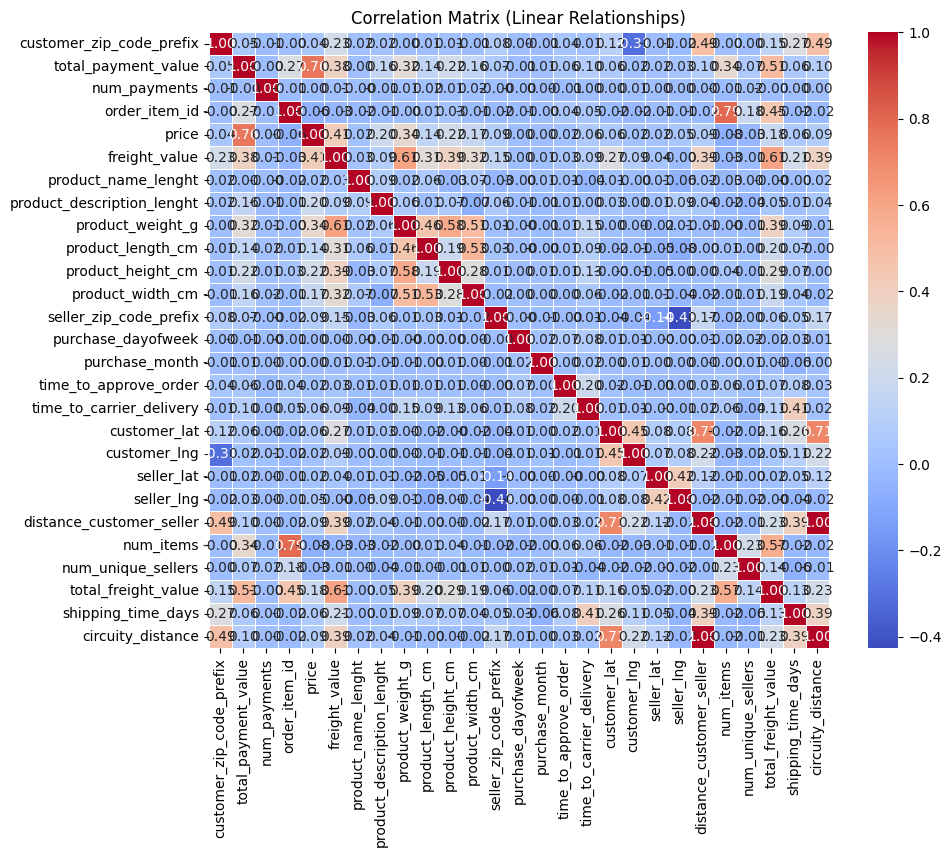

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CLEANING
# Use the cleaned dataframe from the new workflow
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) # Slightly larger figure for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Linear Relationships)')
plt.show()

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_full,
    y_full,
    test_size=0.2,
    random_state=42
)

print("Shape X_train :", X_train.shape)
print("Shape X_test  :", X_test.shape)
print("Shape y_train :", y_train.shape)
print("Shape y_test  :", y_test.shape)

# 2. Baseline très simple : on prédit toujours la moyenne globale de y_train
y_mean = y_train.mean()

# np.full avec la même shape que y_test
y_pred_baseline = np.full(shape=y_test.shape, fill_value=y_mean, dtype=float)

# MAE
mae_base  = mean_absolute_error(y_test, y_pred_baseline)

# MSE puis RMSE (pas d'argument squared dans ta version)
mse_base  = mean_squared_error(y_test, y_pred_baseline)
rmse_base = np.sqrt(mse_base)

# R²
r2_base   = r2_score(y_test, y_pred_baseline)

print(f"Baseline (moyenne globale) → MAE = {mae_base:.3f} jours, RMSE = {rmse_base:.3f} jours, R² = {r2_base:.3f}")


Shape X_train : (86688, 32)
Shape X_test  : (21673, 32)
Shape y_train : (86688,)
Shape y_test  : (21673,)
Baseline (moyenne globale) → MAE = 5.585 jours, RMSE = 7.276 jours, R² = -0.000


In [188]:
# Sauvegarder les index du split actuel pour les réutiliser
train_idx = X_train.index
test_idx = X_test.index


In [189]:
# On part du df_model déjà filtré (1 à 40 jours)
df_train = df_model.loc[train_idx].copy()

# Vérif rapide
print("time_to_carrier_delivery présent ?", "time_to_carrier_delivery" in df_train.columns)
print("Nb vendeurs dans le train :", df_train["seller_id"].nunique())

# 1. Moyenne du temps d'expédition par vendeur (calculé uniquement sur le TRAIN)
seller_avg = (
    df_train
    .groupby("seller_id")["time_to_carrier_delivery"]
    .mean()
    .rename("seller_avg_dispatch")
)

seller_avg.head()


time_to_carrier_delivery présent ? True
Nb vendeurs dans le train : 2823


seller_id
0015a82c2db000af6aaaf3ae2ecb0532    122.155556
001cca7ae9ae17fb1caed9dfb1094831     62.356585
002100f778ceb8431b7a1020ff7ab48f    113.698150
003554e2dce176b5555353e4f3555ac8     12.877500
004c9cd9d87a3c30c522c48c4fc07416     41.469998
Name: seller_avg_dispatch, dtype: float64

In [190]:
# 2. Ajouter la feature seller_avg_dispatch à tout df_model
df_model["seller_avg_dispatch"] = df_model["seller_id"].map(seller_avg)

# 3. Pour les vendeurs jamais vus dans le TRAIN → on met la moyenne globale du train
global_avg_dispatch = df_train["time_to_carrier_delivery"].mean()
df_model["seller_avg_dispatch"] = df_model["seller_avg_dispatch"].fillna(global_avg_dispatch)

df_model[["seller_id", "time_to_carrier_delivery", "seller_avg_dispatch"]].head()


,seller_id,time_to_carrier_delivery,seller_avg_dispatch
0,3504c0cb71d7fa48d967e0e4c94d59d9,56.974167,43.236353
1,289cdb325fb7e7f891c38608bf9e0962,41.823056,38.597164
2,4869f7a5dfa277a7dca6462dcf3b52b2,5.186389,66.005360
3,66922902710d126a0e7d26b0e3805106,90.198056,74.758352
4,2c9e548be18521d1c43cde1c582c6de8,22.465278,45.207392


In [191]:
# On repart de target, cols_to_drop, df_model, etc.
X_full = df_model.drop(columns=cols_to_drop, errors="ignore")
y_full = df_model[target]

print("Nouvelles dimensions de X_full :", X_full.shape)
print("seller_avg_dispatch" in X_full.columns)


Nouvelles dimensions de X_full : (108361, 33)
True


In [192]:
# Reconstruire X_train / X_test cohérents avec le même split
X_train = X_full.loc[train_idx]
X_test  = X_full.loc[test_idx]
y_train = y_full.loc[train_idx]
y_test  = y_full.loc[test_idx]

print("X_train :", X_train.shape, "X_test :", X_test.shape)


X_train : (86688, 33) X_test : (21673, 33)


In [193]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Colonnes numériques / catégorielles avec la nouvelle feature
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols     = X_train.select_dtypes(include=["object", "category"]).columns

print("Numériques :", len(numeric_cols), "Catégorielles :", len(cat_cols))

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

# 2. XGBoost avec les meilleurs hyperparamètres trouvés
xgb_reg_best = XGBRegressor(
    n_estimators=800,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=1.0,
    min_child_weight=3,
    objective="reg:squarederror",
    n_jobs=-1,
    random_state=42,
)

xgb_pipeline_best = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", xgb_reg_best),
])

# 3. Entraînement
xgb_pipeline_best.fit(X_train, y_train)

# 4. Évaluation
y_pred_new = xgb_pipeline_best.predict(X_test)

mae_new  = mean_absolute_error(y_test, y_pred_new)
mse_new  = mean_squared_error(y_test, y_pred_new)
rmse_new = np.sqrt(mse_new)
r2_new   = r2_score(y_test, y_pred_new)

print(f"XGBoost + seller_avg_dispatch → MAE = {mae_new:.3f} jours, RMSE = {rmse_new:.3f} jours, R² = {r2_new:.3f}")


Numériques : 26 Catégorielles : 7
XGBoost + seller_avg_dispatch → MAE = 3.419 jours, RMSE = 4.960 jours, R² = 0.535


In [194]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Nouveau dataframe d'évaluation basé sur le modèle XGBoost + seller_avg_dispatch
test_eval_new = df_model.loc[X_test.index].copy()

test_eval_new["shipping_time_pred"] = y_pred_new
test_eval_new["error_days"] = test_eval_new["shipping_time_pred"] - test_eval_new["shipping_time_days"]
test_eval_new["abs_error_days"] = test_eval_new["error_days"].abs()

test_eval_new[["shipping_time_days", "shipping_time_pred", "error_days", "abs_error_days"]].head()


,shipping_time_days,shipping_time_pred,error_days,abs_error_days
98225,9.0,7.705439,-1.294561,1.294561
59182,5.0,5.655854,0.655854,0.655854
10722,7.0,9.873536,2.873536,2.873536
31728,14.0,14.253889,0.253889,0.253889
6532,12.0,13.082630,1.082630,1.082630


In [195]:
# Variable de distance (adapte si tu utilises "distance_customer_seller")
distance_col = "circuity_distance"

bins = [0, 100, 300, 800, np.inf]
labels = ["0-100 km", "100-300 km", "300-800 km", "> 800 km"]

test_eval_new["distance_bucket"] = pd.cut(
    test_eval_new[distance_col],
    bins=bins,
    labels=labels,
    include_lowest=True
)

group_dist_new = (
    test_eval_new
    .groupby("distance_bucket")
    .apply(lambda g: pd.Series({
        "count": len(g),
        "MAE": mean_absolute_error(g["shipping_time_days"], g["shipping_time_pred"]),
        "RMSE": np.sqrt(mean_squared_error(g["shipping_time_days"], g["shipping_time_pred"]))
    }))
)

group_dist_new


C:\Users\Reda\AppData\Local\Temp\ipykernel_18856\554133651.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("distance_bucket")
C:\Users\Reda\AppData\Local\Temp\ipykernel_18856\554133651.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,count,MAE,RMSE
distance_bucket,,,
0-100 km,3453.0,2.230045,3.449318
100-300 km,2579.0,2.848754,4.230618
300-800 km,8428.0,3.487288,5.010546
> 800 km,7213.0,4.111289,5.701292


In [196]:
print(test_eval_new.columns.tolist())


['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_state', 'total_payment_value', 'num_payments', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix', 'seller_state', 'purchase_dayofweek', 'purchase_month', 'time_to_approve_order', 'time_to_carrier_delivery', 'purchase_season', 'customer_lat', 'customer_lng', 'customer_state_geo', 'seller_lat', 'seller_lng', 'seller_state_geo', 'distance_customer_seller', 'num_items', 'num_unique_sellers', 'total_freight_value', 'shipping_time_days', 'circuity_distance', 'seller_avg_dispatch', 'shipping_time_pred', 'error_days', 'abs_

In [197]:
# adapte les noms si besoin (customer_state_x / seller_state_y etc.)
test_eval_new["intra_state"] = np.where(
    test_eval_new["customer_state"] == test_eval_new["seller_state"],
    "intra",
    "inter"
)


In [198]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# R² par groupe intra / inter-état
r2_by_route = (
    test_eval_new
    .groupby("intra_state")
    .apply(lambda g: pd.Series({
        "count": len(g),
        "MAE": mean_absolute_error(g["shipping_time_days"], g["shipping_time_pred"]),
        "RMSE": np.sqrt(mean_squared_error(g["shipping_time_days"], g["shipping_time_pred"])),
        "R2": r2_score(g["shipping_time_days"], g["shipping_time_pred"])
    }))
)

r2_by_route


C:\Users\Reda\AppData\Local\Temp\ipykernel_18856\4166406023.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,count,MAE,RMSE,R2
intra_state,,,,
inter,13749.0,3.892700,5.468398,0.434467
intra,7924.0,2.596181,3.926175,0.442540


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# On part de df_model, y_test, y_pred_new (le modèle actuel), X_test

# 1. DataFrame avec les vraies valeurs et les prédictions
test_eval = df_model.loc[X_test.index].copy()
test_eval["shipping_time_pred"] = y_pred_new
test_eval["error_days"] = test_eval["shipping_time_pred"] - test_eval["shipping_time_days"]
test_eval["abs_error_days"] = test_eval["error_days"].abs()

test_eval[["shipping_time_days", "shipping_time_pred", "error_days", "abs_error_days"]].head()

,shipping_time_days,shipping_time_pred,error_days,abs_error_days
98225,9.0,7.705439,-1.294561,1.294561
59182,5.0,5.655854,0.655854,0.655854
10722,7.0,9.873536,2.873536,2.873536
31728,14.0,14.253889,0.253889,0.253889
6532,12.0,13.082630,1.082630,1.082630


intra_state
inter    13749
intra     7924
Name: count, dtype: int64

=== INTRA ===
Nombre d'observations : 7924


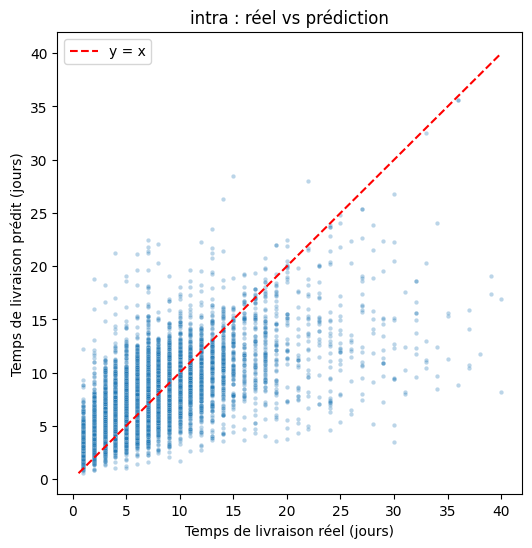

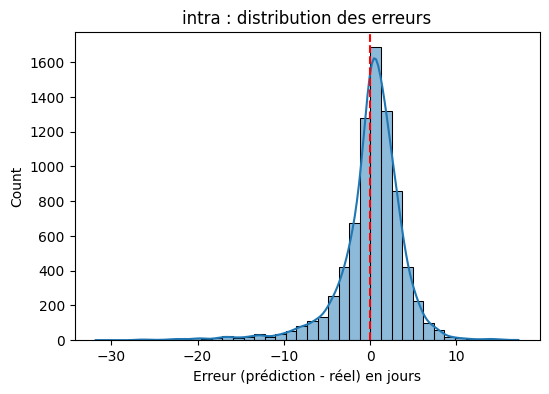


=== INTER ===
Nombre d'observations : 13749


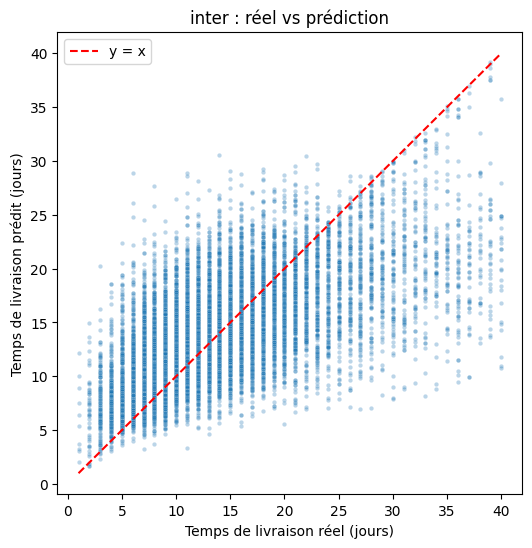

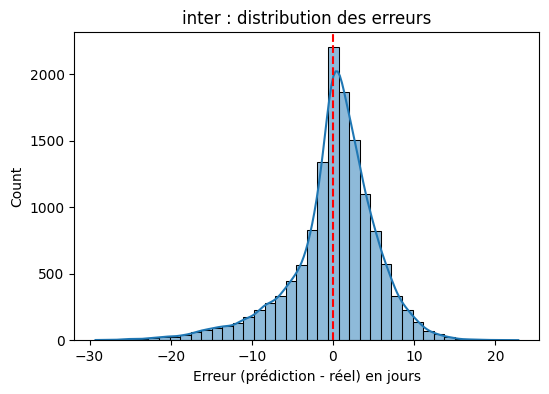

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ====== Préparer test_eval_new si besoin (robuste au Run All) ======
# 1) récupérer les lignes du test
if "test_eval_new" not in globals():
    test_eval_new = df_model.loc[X_test.index].copy()

# 2) ajouter la prédiction du modèle actuel
if "shipping_time_pred" not in test_eval_new.columns:
    test_eval_new["shipping_time_pred"] = y_pred_new

# 3) erreurs
test_eval_new["error_days"] = test_eval_new["shipping_time_pred"] - test_eval_new["shipping_time_days"]
test_eval_new["abs_error_days"] = test_eval_new["error_days"].abs()

# 4) intra/inter état (selon TON notebook : "intra" / "inter")
if "intra_state" not in test_eval_new.columns:
    test_eval_new["intra_state"] = np.where(
        test_eval_new["customer_state"] == test_eval_new["seller_state"],
        "intra",
        "inter"
    )

print(test_eval_new["intra_state"].value_counts())

# ====== Plots : scatter + distribution des erreurs (prédiction - réel) ======
for etat in ["intra", "inter"]:
    subset = test_eval_new[test_eval_new["intra_state"] == etat].copy()

    print(f"\n=== {etat.upper()} ===")
    print("Nombre d'observations :", len(subset))

    if len(subset) == 0:
        continue

    # 1) Scatter réel vs prédiction
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        data=subset,
        x="shipping_time_days",
        y="shipping_time_pred",
        alpha=0.3,
        s=10
    )

    min_val = min(subset["shipping_time_days"].min(), subset["shipping_time_pred"].min())
    max_val = max(subset["shipping_time_days"].max(), subset["shipping_time_pred"].max())
    plt.plot([min_val, max_val], [min_val, max_val], "r--", label="y = x")

    plt.xlabel("Temps de livraison réel (jours)")
    plt.ylabel("Temps de livraison prédit (jours)")
    plt.title(f"{etat} : réel vs prédiction")
    plt.legend()
    plt.show()

    # 2) Distribution des erreurs
    plt.figure(figsize=(6, 4))
    sns.histplot(subset["error_days"], bins=40, kde=True)
    plt.axvline(0, color="red", linestyle="--")
    plt.xlabel("Erreur (prédiction - réel) en jours")
    plt.title(f"{etat} : distribution des erreurs")
    plt.show()


# SAUVEGARDE DU MODÈLE POUR PRODUCTION

Sauvegarde du modèle XGBoost + preprocessing pour l'interface Streamlit

In [201]:
import pickle
import json
from pathlib import Path

# Créer le dossier pour le modèle
save_dir = Path("../streamlit_app/models/shipping_forecast")
save_dir.mkdir(parents=True, exist_ok=True)

# 1. Sauvegarder le pipeline complet (preprocessing + XGBoost)
with open(save_dir / "xgboost_pipeline.pkl", 'wb') as f:
    pickle.dump(xgb_pipeline_best, f)
print("✅ Pipeline XGBoost sauvegardé")

# 2. Sauvegarder les noms des colonnes
feature_cols = list(X_train.columns)
with open(save_dir / "feature_names.pkl", 'wb') as f:
    pickle.dump(feature_cols, f)
print("✅ Liste des features sauvegardée")

# 3. Sauvegarder seller_avg_dispatch (mapping seller_id -> avg_dispatch)
with open(save_dir / "seller_avg_dispatch.pkl", 'wb') as f:
    pickle.dump(seller_avg, f)
print("✅ Seller avg dispatch sauvegardé")

# 4. Sauvegarder la moyenne globale de dispatch
with open(save_dir / "global_avg_dispatch.pkl", 'wb') as f:
    pickle.dump(global_avg_dispatch, f)
print("✅ Global avg dispatch sauvegardé")

# 5. Sauvegarder des données de test pour validation
test_sample = {
    'X_test': X_test.head(100),
    'y_test': y_test.head(100)
}
with open(save_dir / "test_data.pkl", 'wb') as f:
    pickle.dump(test_sample, f)
print("✅ Données de test sauvegardées")

print(f"\n📁 Tous les fichiers sauvegardés dans: {save_dir}")

✅ Pipeline XGBoost sauvegardé
✅ Liste des features sauvegardée
✅ Seller avg dispatch sauvegardé
✅ Global avg dispatch sauvegardé
✅ Données de test sauvegardées

📁 Tous les fichiers sauvegardés dans: ..\streamlit_app\models\shipping_forecast


In [202]:
# Configuration et métadonnées du modèle
config = {
    "model_name": "XGBoost Shipping Time Forecast",
    "model_type": "shipping_prediction",
    "trained_date": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
    "algorithm": "XGBoost Regressor",
    
    "data_info": {
        "n_train_samples": len(X_train),
        "n_test_samples": len(X_test),
        "n_features": len(feature_cols),
        "target": "shipping_time_days",
        "target_range": f"{df_model['shipping_time_days'].min():.0f} - {df_model['shipping_time_days'].max():.0f} jours"
    },
    
    "metrics": {
        "mae": float(mae_new),
        "rmse": float(rmse_new),
        "r2_score": float(r2_new)
    },
    
    "hyperparameters": {
        "n_estimators": 800,
        "max_depth": 10,
        "learning_rate": 0.05,
        "subsample": 0.7,
        "colsample_bytree": 1.0,
        "min_child_weight": 3
    },
    
    "features": {
        "total_features": len(feature_cols),
        "numeric_features": list(numeric_cols),
        "categorical_features": list(cat_cols),
        "key_feature": "seller_avg_dispatch",
        "feature_categories": {
            "temporal": ["purchase_dayofweek", "purchase_month", "purchase_season"],
            "geographic": ["distance_customer_seller", "circuity_distance"],
            "order_details": ["num_items", "num_unique_sellers", "total_freight_value"],
            "product": ["price", "freight_value", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"],
            "seller": ["seller_avg_dispatch"]
        }
    },
    
    "prediction_info": {
        "target": "shipping_time_days",
        "unit": "jours",
        "requires_features": [
            "seller_id",
            "customer_zip_code_prefix",
            "seller_zip_code_prefix",
            "purchase_dayofweek",
            "purchase_month",
            "distance_customer_seller",
            "num_items",
            "product_weight_g"
        ],
        "output_type": "float (jours de livraison)"
    }
}

# Sauvegarder la config
with open(save_dir / "config.json", 'w', encoding='utf-8') as f:
    json.dump(config, f, indent=2, ensure_ascii=False)

print("✅ Configuration sauvegardée")
print("\n" + "="*60)
print("📊 RÉSUMÉ DU MODÈLE")
print("="*60)
print(f"MAE  : {mae_new:.4f} jours")
print(f"RMSE : {rmse_new:.4f} jours")
print(f"R²   : {r2_new:.4f}")
print(f"\nFeatures : {len(feature_cols)}")
print(f"Train samples : {len(X_train):,}")
print(f"Test samples  : {len(X_test):,}")
print("="*60)

✅ Configuration sauvegardée

📊 RÉSUMÉ DU MODÈLE
MAE  : 3.4187 jours
RMSE : 4.9605 jours
R²   : 0.5352

Features : 33
Train samples : 86,688
Test samples  : 21,673
